In [1]:
import sys
sys.path.append('./code')
from importlib import reload

In [2]:
row_colors = ['lightgreen', 'green', 'orange']

columns_to_names = {
    0 : 'Active 1',
    4 : 'Active 2',
    18 : 'Repressive',
}

row_colors_dict = {
'Active 1' : 'lightgreen',
'Active 2' : 'green',
'Repressive' : 'orange',
}

In [3]:
import make_figure4
reload(make_figure4)
from make_figure4 import *
import pickle

goodinds = pickle.load(open('./for_snipping/goodinds', 'rb'))
merged_clustdict = pickle.load(open('./for_snipping/merged_clustdict', 'rb'))
merged_inds_to_subset = pickle.load(open('./for_snipping/merged_inds_to_subset', 'rb'))


cooldict_50kb = pickle.load(open('./for_snipping/cooldict_50kb', 'rb'))
ind_to_gene = pickle.load(open('./for_snipping/ind_to_gene', 'rb'))
all_ind_to_region = pickle.load(open('./for_snipping/all_ind_to_region', 'rb'))

my_treg_comp = pickle.load(open('./for_snipping/my_treg_comp', 'rb'))



In [4]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

In [5]:
from initialize import *

treg_250kb = cooler.Cooler('./Treg_all.mcool::/resolutions/250000')
treg_50kb = cooler.Cooler('./Treg_all.mcool::/resolutions/50000')

(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(treg_250kb)


In [6]:
inter_and_intra_connections_treg = pickle.load(open('./for_snipping/inter_and_intra_connections_treg', 'rb'))
inter_and_intra_connections_tcon = pickle.load(open('./for_snipping/inter_and_intra_connections_tcon', 'rb'))

In [7]:
stat_df = pd.read_csv('./diff_ms_dfs/stat_df.csv', index_col = 0)
pval_df = pd.read_csv('./diff_ms_dfs/pval_df.csv', index_col = 0)

diff_inds = stat_df.index[((stat_df.abs() > 1.5) & (pval_df < .01)).any(axis=1)]

In [96]:
%autoreload 2
from hub_pileup import pileup_bin_pairs

padding_size = 50

our_treg_25kb = cooler.Cooler('./Treg_all.mcool::/resolutions/25000')
our_tcon_25kb = cooler.Cooler('./Tconv_all.mcool::/resolutions/25000')

megaloop_pileup_cooldict = {
    'Our_Treg' : our_treg_25kb,
    'Our_Tcon' : our_tcon_25kb,
}

df1 = pd.DataFrame()
df1['ind'] = diff_inds
df1['chrom'] = [all_ind_to_region[x][0] for x in df1['ind']]
df1['cluster'] = -1

df2 = pd.DataFrame()
df2['ind'] = goodinds
df2['chrom'] = [all_ind_to_region[x][0] for x in goodinds]
df2['cluster'] = merged_clustdict['all']
df2 = df2[df2['cluster'].isin([0, 4, 18])]

differential_mat_dict, differential_metadata = pileup_bin_pairs(df1, df2, megaloop_pileup_cooldict,
                                                                chrom_to_start, inter_and_intra_connections_treg, 
                                                                inter_and_intra_connections_tcon, resolution_in=250_000, 
                                                                resolution_out = 25_000, 
                                                                intra=False, inter=True, padding_size=padding_size, fetch_oe=True
                                                               )

Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 13
Done with 13
Done 

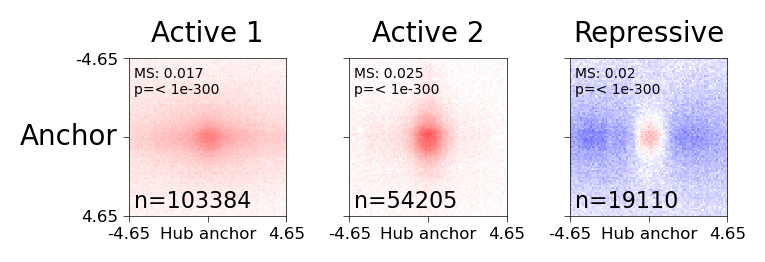

In [103]:
from hub_pileup import plot_pileup_mat

# name = get_name(ind, ind_to_gene)
fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100, xspace=1.4)
for c, cluster in enumerate([0, 4, 18]):
    plt.sca(axs[c])
    idx = ( ((stat_df.loc[differential_metadata['ind1'].values][str(cluster)] > 1.5
             ).values & (differential_metadata['cluster2']==cluster).values) 
          )
    rows = []

    mats = (differential_mat_dict['Our_Treg'][idx] - differential_mat_dict['Our_Tcon'][idx])[:, 8:, 8:]
    plot_pileup_mat(mats,  plt.gca(), cmap = 'bwr', vmin = -.05, vmax = .05, center=4)
    plt.title(columns_to_names[cluster])
    plt.grid(False)


    
n = mats.shape[1]
cutoff = n*50_000/1e6
mb = mats.shape[1]*50e3 // 2 / 1e6

for c, a in enumerate(axs):
    plt.sca(axs[c])

    plt.yticks([-mb, 0, mb])
    plt.gca().set_yticklabels([-cutoff, 'Anchor', cutoff])
    plt.gca().get_yticklabels()[1].set_fontsize(10)
    plt.gca().get_yticklabels()[1].set_rotation(0)
    plt.gca().get_yticklabels()[1].set_va('center')

    plt.gca().set_xticks([-mb, 0, mb])
    plt.gca().set_xticklabels([-cutoff, "Hub anchor", cutoff])

    a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
    if c % n != 0 :
        plt.gca().tick_params(labelleft=False)

fig.savefig('./plots/differential_megaloop_pileup/treg_up_ms.pdf', bbox_inches='tight')

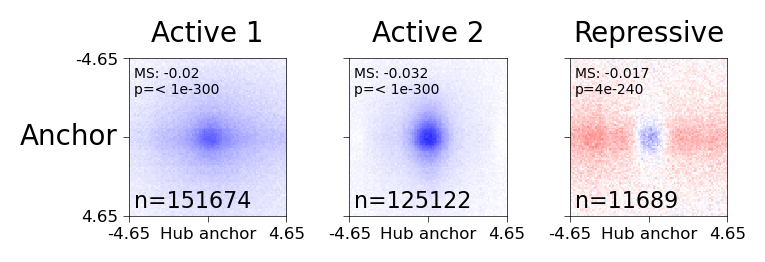

In [104]:
from hub_pileup import plot_pileup_mat

# name = get_name(ind, ind_to_gene)
fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100, xspace=1.4)
for c, cluster in enumerate([0, 4, 18]):
    plt.sca(axs[c])
    idx = ( ((stat_df.loc[differential_metadata['ind1'].values][str(cluster)] < -1.5
             ).values & (differential_metadata['cluster2']==cluster).values) 
          )
    rows = []

    mats = (differential_mat_dict['Our_Treg'][idx] - differential_mat_dict['Our_Tcon'][idx])[:, 8:, 8:]
    plot_pileup_mat(mats,  plt.gca(), cmap = 'bwr', vmin = -.05, vmax = .05, center=4)
    plt.title(columns_to_names[cluster])
    plt.grid(False)


    
n = mats.shape[1]
cutoff = n*50_000/1e6
mb = mats.shape[1]*50e3 // 2 / 1e6

for c, a in enumerate(axs):
    plt.sca(axs[c])

    plt.yticks([-mb, 0, mb])
    plt.gca().set_yticklabels([-cutoff, 'Anchor', cutoff])
    plt.gca().get_yticklabels()[1].set_fontsize(10)
    plt.gca().get_yticklabels()[1].set_rotation(0)
    plt.gca().get_yticklabels()[1].set_va('center')

    plt.gca().set_xticks([-mb, 0, mb])
    plt.gca().set_xticklabels([-cutoff, "Hub anchor", cutoff])

    a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
    if c % n != 0 :
        plt.gca().tick_params(labelleft=False)

fig.savefig('./plots/differential_megaloop_pileup/treg_down_ms.pdf', bbox_inches='tight')

In [36]:
!mkdir -p plots/differential_megaloop_pileup

((stat_df.loc[diff_inds].abs() > 1.5) * np.sign(stat_df.loc[diff_inds])).apply(pd.value_counts)

In [58]:
%autoreload 2
from hub_pileup import pileup_bin_pairs

padding_size = 50

our_treg_25kb = cooler.Cooler('./Treg_all.mcool::/resolutions/25000')
our_tcon_25kb = cooler.Cooler('./Tconv_all.mcool::/resolutions/25000')

megaloop_pileup_cooldict = {
    'Our_Treg' : our_treg_25kb,
    'Our_Tcon' : our_tcon_25kb,
}

df1 = pd.DataFrame()
df1['ind'] = stat_df.index
df1['chrom'] = [all_ind_to_region[x][0] for x in df1['ind']]
df1['cluster'] = -1

df2 = pd.DataFrame()
df2['ind'] = goodinds
df2['chrom'] = [all_ind_to_region[x][0] for x in goodinds]
df2['cluster'] = merged_clustdict['all']
df2 = df2[df2['cluster'].isin([0, 4, 18])]

ns_mat_dict, ns_metadata = pileup_bin_pairs(df1, df2, megaloop_pileup_cooldict,
                                                                chrom_to_start, inter_and_intra_connections_treg, 
                                                                inter_and_intra_connections_tcon, resolution_in=250_000, 
                                                                resolution_out = 25_000, 
                                                                intra=False, inter=True, padding_size=padding_size, fetch_oe=True,
                                                                skip = 10
                                                               )

Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 6
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 13
Done with 13
Done 

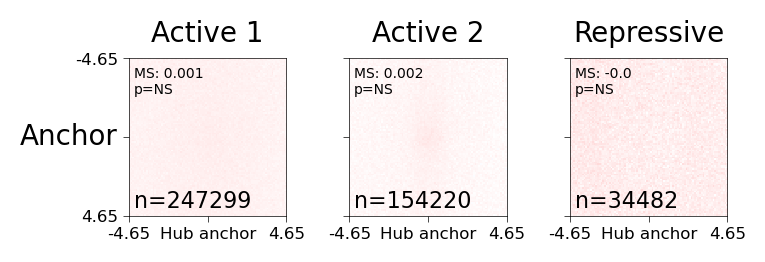

In [109]:
from hub_pileup import plot_pileup_mat

# name = get_name(ind, ind_to_gene)
fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100, xspace=1.4)
for c, cluster in enumerate([0, 4, 18]):
    plt.sca(axs[c])
    idx = ( ((stat_df.loc[ns_metadata['ind1'].values][str(cluster)].abs() < 1.5
             ).values & (ns_metadata['cluster2']==cluster).values) 
          )
    rows = []

    mats = (ns_mat_dict['Our_Treg'][idx] - ns_mat_dict['Our_Tcon'][idx])[:, 8:, 8:]
    plot_pileup_mat(mats,  plt.gca(), cmap = 'bwr', vmin = -.05, vmax = .05, center=4, delta_co=.005)
    plt.title(columns_to_names[cluster])
    plt.grid(False)

    
n = mats.shape[1]
cutoff = n*50_000/1e6
mb = mats.shape[1]*50e3 // 2 / 1e6

for c, a in enumerate(axs):
    plt.sca(axs[c])

    plt.yticks([-mb, 0, mb])
    plt.gca().set_yticklabels([-cutoff, 'Anchor', cutoff])
    plt.gca().get_yticklabels()[1].set_fontsize(10)
    plt.gca().get_yticklabels()[1].set_rotation(0)
    plt.gca().get_yticklabels()[1].set_va('center')

    plt.gca().set_xticks([-mb, 0, mb])
    plt.gca().set_xticklabels([-cutoff, "Hub anchor", cutoff])

    a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
    if c % n != 0 :
        plt.gca().tick_params(labelleft=False)

fig.savefig('./plots/differential_megaloop_pileup/treg_ns_ms.pdf', bbox_inches='tight')

In [67]:
cluster = 0
idx = ( ((stat_df.loc[differential_metadata['ind1'].values][str(cluster)].abs() < 1.5
         ).values & (differential_metadata['cluster2']==cluster).values) 
      )
mats = (differential_mat_dict['Our_Treg'][idx] - differential_mat_dict['Our_Tcon'][idx])


In [91]:
from compute_differential_hic_hub import make_outside_filt, get_inside_outside, test_inside_outside_baseline

n = mats.shape[1]
center = 10
center_only = False
inside_filt, outside_filt = make_outside_filt(n//2, center, center_only=center_only)
(v_middle, v_outside) = get_inside_outside(mats, inside_filt, outside_filt)
# stat, p, delta, _, _ = test_inside_outside_baseline(v_middle, v_outside,)


/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/

<Axes: ylabel='Proportion'>

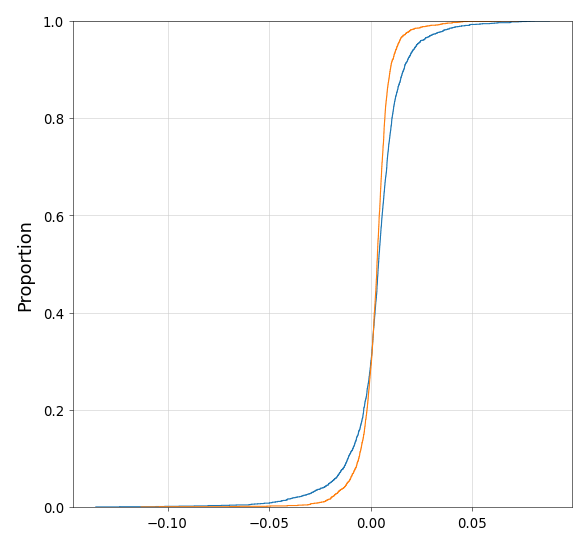

In [92]:
sns.ecdfplot(v_middle[::100])
sns.ecdfplot(v_outside[::100])

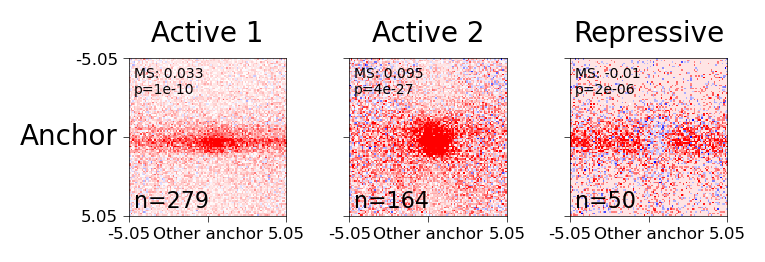

In [19]:
from hub_pileup import plot_pileup_mat

# name = get_name(ind, ind_to_gene)
fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100, xspace=1.4)
for c, cluster in enumerate([0, 4, 18]):
    plt.sca(axs[c])
    idx = ( (differential_metadata['ind1']==278) & (differential_metadata['cluster2']==cluster).values) 
    rows = []
    
    mats = (differential_mat_dict['Our_Treg'][idx] - differential_mat_dict['Our_Tcon'][idx])
    plot_pileup_mat(mats,  plt.gca(), cmap = 'bwr', vmin = -.05, vmax = .05)

    plt.title(columns_to_names[cluster])
    plt.grid(False)
    # plt.text(.03, .05, f'n={idx.sum()}', transform=plt.gca().transAxes, fontsize=8)

    
n = mats.shape[1]
cutoff = n*50_000/1e6
mb = mats.shape[1]*50e3 // 2 / 1e6
# x1, x2 = all_ind_to_region[ind][1], all_ind_to_region[ind][2]
# xs = np.arange(x1 - 50_000*20, x2 + 50_000*20, 50_000)

for c, a in enumerate(axs):
    plt.sca(axs[c])

    plt.yticks([-mb, 0, mb])
    plt.gca().set_yticklabels([-cutoff, 'Anchor', cutoff])
    plt.gca().get_yticklabels()[1].set_fontsize(10)
    plt.gca().get_yticklabels()[1].set_rotation(0)
    plt.gca().get_yticklabels()[1].set_va('center')

    plt.gca().set_xticks([-mb, 0, mb])
    plt.gca().set_xticklabels([-cutoff, "Other anchor", cutoff])

    a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
    if c % n != 0 :
        plt.gca().tick_params(labelleft=False)

/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:55: RuntimeWarning: Mean of empty slice
  v_middle = np.nanmean(ms_treg[:, inside_filt], axis=1)
/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:55: RuntimeWarning: Mean of empty slice
  v_middle = np.nanmean(ms_treg[:, inside_filt], axis=1)


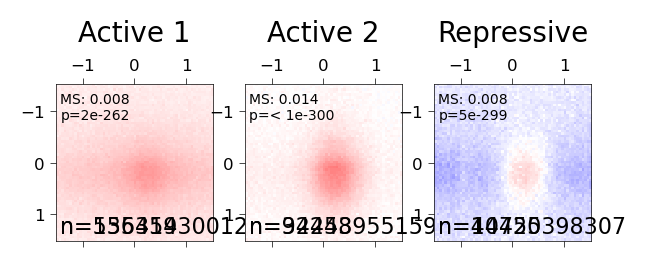

In [63]:
from hub_pileup import plot_pileup_mat

# name = get_name(ind, ind_to_gene)
fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100)
for c, cluster in enumerate([0, 4, 18]):
    plt.sca(axs[c])
    idx = np.where( ((stat_df.loc[differential_metadata['ind1'].values][str(cluster)] > 0
             ).values & (differential_metadata['cluster2']==cluster).values) 
          )[0]
    rows = []

    mats = (differential_mat_dict['Our_Treg'][idx] - differential_mat_dict['Our_Tcon'][idx])
    plot_pileup_mat(mats,  plt.gca(), cmap = 'bwr', vmin = -.05, vmax = .05)

    plt.title(columns_to_names[cluster])
    plt.grid(False)
    plt.text(.03, .05, f'n={idx.sum()}', transform=plt.gca().transAxes, fontsize=8)


fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100)
for c, cluster in enumerate([0, 4, 18]):
    plt.sca(axs[c])
    idx = np.where( ((stat_df.loc[differential_metadata['ind1'].values][str(cluster)] < 0
             ).values & (differential_metadata['cluster2']==cluster).values) 
          )[0]
    rows = []

    mats = (differential_mat_dict['Our_Treg'][idx] - differential_mat_dict['Our_Tcon'][idx])
    plot_pileup_mat(mats,  plt.gca(), cmap = 'bwr', vmin = -.05, vmax = .05)

    plt.title(columns_to_names[cluster])
    plt.grid(False)
    plt.text(.03, .05, f'n={idx.sum()}', transform=plt.gca().transAxes, fontsize=8)



    
# n = len(mats)
# cutoff = n*50_000/1e6
# mb = mats.shape[1]*50e3 // 2 / 1e6
# # x1, x2 = all_ind_to_region[ind][1], all_ind_to_region[ind][2]
# # xs = np.arange(x1 - 50_000*20, x2 + 50_000*20, 50_000)

# for c, a in enumerate(axs):
#     plt.sca(axs[c])

#     plt.yticks([-mb, 0, mb])
#     plt.gca().set_yticklabels([-cutoff, 'Anchor', cutoff])
#     plt.gca().get_yticklabels()[1].set_fontsize(10)
#     plt.gca().get_yticklabels()[1].set_rotation(0)
#     plt.gca().get_yticklabels()[1].set_va('center')

#     plt.gca().set_xticks([-mb, 0, mb])
#     plt.gca().set_xticklabels([-cutoff, "Other anchor", cutoff])

#     a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
#     # if c % n != 0 :
#     #     plt.gca().tick_params(labelleft=False)